In [1]:
import src.CFDTools as CFD
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os

### Imports

In [2]:
#imports from geometry investigation folder
quarterBase = CFD.importer("CFD Outlet Velocities\\Quarter Twist Base",5,5)
quarterFilletSmall = CFD.importer("CFD Outlet Velocities\\Quarter Twist Fillet Small",5,5)
quarterFilletMedium = CFD.importer("CFD Outlet Velocities\\Quarter Twist Fillet Medium",5,5)
quarterFilletBig = CFD.importer("CFD Outlet Velocities\\Quarter Twist Fillet Big",5,5)

#insert sections
quarterInternal = CFD.importer("CFD Outlet Velocities\\Quarter Twist Internal Section",5,5)
quarterBluffInsert = CFD.importer("CFD Outlet Velocities\\Quarter Twist Bluff Insert",5,5)
quarterTaperedInsert = CFD.importer("CFD Outlet Velocities\\Quarter Twist Tapered Insert",5,5)

#spline sections
splineQuarterTaperedInsert = CFD.importer("CFD Outlet Velocities\\Spline Quarter Twist Tapered Insert",5,5)
splineQuarterRoundedInsert = CFD.importer("CFD Outlet Velocities\\Spline Quarter Twist Rounded Insert",5,5)
spline3_8RoundedInsert = CFD.importer("CFD Outlet Velocities\\Spline 3_8 Twist Rounded Insert",5,5)
s5_16_quarterInsert = CFD.importer("CFD Outlet Velocities\\5_16 Twist Quarter Tapered Insert",5,5)
s5_16_Insert = CFD.importer("CFD Outlet Velocities\\5_16 Twist Tapered Insert",5,5)
aggressiveQuarter = CFD.importer("CFD Outlet Velocities\\Aggressive Quarter Tapered Insert",5,5)
kruger630 = CFD.importer("CFD Outlet Velocities\\Kruger 630",5,5)

#initial lofted section
v_lofted630_coarse = CFD.importer('CFD Outlet Velocities\\Lofted 630 Coarse',5,5)
v_lofted630_medium = CFD.importer('CFD Outlet Velocities\\Lofted 630 Medium',5,5)
v_lofted630_fine = CFD.importer('CFD Outlet Velocities\\Lofted 630 Fine',5,5)
v_lofted630_finest = CFD.importer('CFD Outlet Velocities\\Lofted 630 Finest',5,5)

In [3]:
#imports from older test section evaluation folder
oldPath = 'C:\\Users\\juanb\\Documents\\Universiteit\\4de Jaar\\Skripsie\\Test CFD Models\\CFD Outlet Velocities\\'

v_quarter = CFD.importer(oldPath+'Quarter turn',5,5)
v_8th = CFD.importer(oldPath+'8th turn',5,5)

Flipping of incorrectly oriented arrays

In [4]:
for i in range(3):
    v_lofted630_finest[i][3,:,0] = abs(v_lofted630_finest[i][3,:,0]-max(v_lofted630_finest[i][3,:,0]))
    v_quarter[i][1,:,0] = abs(v_quarter[i][1,:,0]-max(v_quarter[i][1,:,0]))
    v_quarter[i][2,:,0] = abs(v_quarter[i][2,:,0]-max(v_quarter[i][2,:,0]))
    v_8th[i][1,:,0] = abs(v_8th[i][1,:,0]-max(v_8th[i][1,:,0]))
    v_8th[i][2,:,0] = abs(v_8th[i][2,:,0]-max(v_8th[i][2,:,0]))
    for j in range(5):
        quarterBluffInsert[i][j,:,0] = abs(quarterBluffInsert[i][j,:,0]-max(quarterBluffInsert[i][j,:,0]))
        quarterTaperedInsert[i][j,:,0] = abs(quarterTaperedInsert[i][j,:,0]-max(quarterTaperedInsert[i][j,:,0]))
        splineQuarterTaperedInsert[i][j,:,0] = abs(splineQuarterTaperedInsert[i][j,:,0]-max(splineQuarterTaperedInsert[i][j,:,0]))
        splineQuarterRoundedInsert[i][j,:,0] = abs(splineQuarterRoundedInsert[i][j,:,0]-max(splineQuarterRoundedInsert[i][j,:,0]))
        spline3_8RoundedInsert[i][j,:,0] = abs(spline3_8RoundedInsert[i][j,:,0]-max(spline3_8RoundedInsert[i][j,:,0]))
        s5_16_quarterInsert[i][j,:,0] = abs(s5_16_quarterInsert[i][j,:,0]-max(s5_16_quarterInsert[i][j,:,0]))
        s5_16_Insert[i][j,:,0] = abs(s5_16_Insert[i][j,:,0]-max(s5_16_Insert[i][j,:,0]))
        aggressiveQuarter[i][j,:,0] = abs(aggressiveQuarter[i][j,:,0]-max(aggressiveQuarter[i][j,:,0]))


### Line placement matrices

In [5]:
o_y = 0.63

lineCoords = np.array([
    [[0,o_y,0],[0.22274,o_y,0.22274]],
    [[0,o_y,0],[0.12055,o_y,0.29102]],
    [[0,o_y,0],[0,o_y,0.315]],
    [[0,o_y,0],[-0.12055,o_y,0.29102]],
    [[0,o_y,0],[-0.22274,o_y,0.22274]]
])

lineCoords3_8 = np.array([
    [[0,o_y,0],[0,o_y,-0.315]],
    [[0,o_y,0],[0.12055,o_y,-0.29102]],
    [[0,o_y,0],[0.22274,o_y,-0.22274]],
    [[0,o_y,0],[0.29102,o_y,-0.12055]],
    [[0,o_y,0],[0.315,o_y,0]]
])

lineCoords5_16 = np.array([
    [[0,o_y,0],[0.29102,o_y,-0.12055]],
    [[0,o_y,0],[0.315,o_y,0]],
    [[0,o_y,0],[0.29102,o_y,0.12055]],
    [[0,o_y,0],[0.22274,o_y,0.22274]],
    [[0,o_y,0],[0.12055,o_y,0.29102]]
])

kruger_lineCoords = np.array([
    [[0,o_y,0],[0.30955,o_y,-0.05835]],
    [[0,o_y,0],[0.30831,o_y,0.06455]],
    [[0,o_y,0],[0.26014,o_y,0.17763]],
    [[0,o_y,0],[0.17236,o_y,0.26366]],
    [[0,o_y,0],[0.05835,o_y,0.30955]]
])

lineCoords_lofted630 = np.array([
    [[0.395,o_y,-0.395],[0.70455,o_y,-0.33665]],
    [[0.395,o_y,-0.395],[0.65866,o_y,-0.22264]],
    [[0.395,o_y,-0.395],[0.57263,o_y,-0.13486]],
    [[0.395,o_y,-0.395],[0.45955,o_y,-0.08669]],
    [[0.395,o_y,-0.395],[0.33665,o_y,-0.08545]]
])

lineCoords_quarter = np.array([
    [[0.395,o_y,-0.395],[0.79,o_y,0]],
    [[0.395,o_y,-0.395],[0.55861,o_y,0]],
    [[0.395,o_y,-0.395],[0.395,o_y,0]],
    [[0.395,o_y,-0.395],[0.23139,o_y,0]],
    [[0.395,o_y,-0.395],[0,o_y,0]]
])

lineCoords_8th = np.array([
    [[0.395,o_y,-0.395],[0.95361,o_y,-0.395]],
    [[0.395,o_y,-0.395],[0.790,o_y,-0.23139]],
    [[0.395,o_y,-0.395],[0.67431,o_y,-0.11569]],
    [[0.395,o_y,-0.395],[0.55861,o_y,0]],
    [[0.395,o_y,-0.395],[0.395,o_y,0.16361]]
])

lineAngle = CFD.lineAngle(lineCoords)
lineAngles3_8 = CFD.lineAngle(lineCoords3_8)
lineAngles5_16 = CFD.lineAngle(lineCoords5_16)
lineAnglesKruger = CFD.lineAngle(kruger_lineCoords)
lineAngles_lofted630 = CFD.lineAngle(lineCoords_lofted630)
lineAngles_quarter = CFD.lineAngle(lineCoords_quarter)
lineAngles_8th = CFD.lineAngle(lineCoords_8th)

### Conversion to polar coordinate system

In [6]:
#filleted sections
polarQuarterBase = CFD.cartesianToRadial(quarterBase[0],quarterBase[2],lineAngle)
polarQuarterFilletSmall = CFD.cartesianToRadial(quarterFilletSmall[0],quarterFilletSmall[2],lineAngle)
polarQuarterFilletMedium = CFD.cartesianToRadial(quarterFilletMedium[0],quarterFilletMedium[2],lineAngle)
polarQuarterFilletBig = CFD.cartesianToRadial(quarterFilletBig[0],quarterFilletBig[2],lineAngle)

#sections with inserts
polarQuarterInternal = CFD.cartesianToRadial(quarterInternal[0],quarterInternal[2],lineAngle)
polarQuarterBluffInsert = CFD.cartesianToRadial(quarterBluffInsert[0],quarterBluffInsert[2],lineAngle)
polarQuarterTaperedInsert = CFD.cartesianToRadial(quarterTaperedInsert[0],quarterTaperedInsert[2],lineAngle)

#splined sections
polarSplineQuarterTaperedInsert = CFD.cartesianToRadial(splineQuarterTaperedInsert[0],splineQuarterTaperedInsert[2],lineAngles3_8)
polarSplineQuarterRoundedInsert = CFD.cartesianToRadial(splineQuarterRoundedInsert[0],splineQuarterRoundedInsert[2],lineAngles3_8)
polarSpline3_8RoundedInsert = CFD.cartesianToRadial(spline3_8RoundedInsert[0],spline3_8RoundedInsert[2],lineAngles3_8)
polarQuarterAggressive = CFD.cartesianToRadial(aggressiveQuarter[0],aggressiveQuarter[2],lineAngle)
polar5_16QuarterInsert = CFD.cartesianToRadial(s5_16_quarterInsert[0],s5_16_quarterInsert[2],lineAngles5_16)
polar5_16Insert = CFD.cartesianToRadial(s5_16_Insert[0],s5_16_Insert[2],lineAngles5_16)

#kruger
polarKruger630 = CFD.cartesianToRadial(kruger630[0],kruger630[2],lineAnglesKruger)

#old sections
vpolar_lofted630_coarse = CFD.cartesianToRadial(v_lofted630_coarse[0],v_lofted630_coarse[2],lineAngles_lofted630)
vpolar_lofted630_medium = CFD.cartesianToRadial(v_lofted630_medium[0],v_lofted630_medium[2],lineAngles_lofted630)
vpolar_lofted630_fine = CFD.cartesianToRadial(v_lofted630_fine[0],v_lofted630_fine[2],lineAngles_lofted630)
vpolar_lofted630_finest = CFD.cartesianToRadial(v_lofted630_finest[0],v_lofted630_finest[2],lineAngles_lofted630)
vpolar_quarter = CFD.cartesianToRadial(v_quarter[0],v_quarter[2],lineAngles_quarter)
vpolar_8th = CFD.cartesianToRadial(v_8th[0],v_8th[2],lineAngles_8th)

In [7]:
kruger = polarKruger630[1][:,:,1]*100/np.max(kruger630[1][:,:,1])
loft630 = vpolar_lofted630_fine[1][:,:,1]*100/np.max(v_lofted630_fine[1][:,:,1])
squareQuarter = vpolar_8th[1][:,:,1]*100/np.max(v_8th[1][:,:,1])
square8th = vpolar_quarter[1][:,:,1]*100/np.max(v_quarter[1][:,:,1])

means = [np.mean(kruger),np.mean(loft630),np.mean(squareQuarter),np.mean(square8th)]
means

maxes = [np.max(abs(kruger)),np.max(abs(loft630)),np.max(abs(squareQuarter)),np.max(abs(square8th))]
maxes

mins = [np.min(abs(kruger)),np.min(abs(loft630)),np.min(abs(squareQuarter)),np.min(abs(square8th))]
mins

[0.0, 0.0, 0.0, 0.0]

In [8]:
allResults = CFD.summariser([
    polarQuarterBase,
    polarQuarterFilletSmall,
    polarQuarterFilletMedium,
    polarQuarterFilletBig,
    polarQuarterInternal,
    polarQuarterBluffInsert,
    polarQuarterTaperedInsert,
    polarSplineQuarterTaperedInsert,
    polarSplineQuarterRoundedInsert,
    polarSpline3_8RoundedInsert,
    polarQuarterAggressive,
    polar5_16QuarterInsert,
    polar5_16Insert
],[
    quarterBase,
    quarterFilletSmall,
    quarterFilletMedium,
    quarterFilletBig,
    quarterInternal,
    quarterBluffInsert,
    quarterTaperedInsert,
    splineQuarterTaperedInsert,
    splineQuarterRoundedInsert,
    spline3_8RoundedInsert,
    aggressiveQuarter,
    s5_16_quarterInsert,
    s5_16_Insert
])

allResults

[[0.14918004403502055,
  0.10215078869628906,
  0.060039980294174816,
  0.03586314338009201,
  -0.01483866294206692,
  0.21761320741885523,
  0.5161027811365062,
  0.22636205769357254,
  0.20722810758110602,
  6.366537838928396,
  1.5797993097284504,
  3.2855183174818343,
  4.025475995644736,
  0.2588291496157709,
  0.5536164491569588,
  0.46403267968707934,
  0.4101677717508791,
  0.3289378299733158,
  -4.230932226689747,
  -4.103564039948289],
 [6.121042408061845,
  5.471020974736058,
  4.029553830884378,
  2.7156947671704366,
  0.382753128967308,
  7.176546161562164,
  11.154374996717495,
  10.021106055133352,
  6.609422136577619,
  74.95314710503922,
  22.66969502921636,
  36.92969381906947,
  44.932000278687376,
  6.939124288410278,
  3.847312726106743,
  3.9364757931839987,
  3.933976554948116,
  4.225177538892158,
  31.60613500258888,
  28.922913579629036],
 [6.121042408061845,
  5.471020974736058,
  4.029553830884378,
  2.7156947671704366,
  0.382753128967308,
  7.1765461615621

### Plots to compare filleted sections

In [9]:
filletList = [quarterBase,
                quarterFilletSmall,
                quarterFilletMedium,
                quarterFilletBig,
            ]

polarFilletList = [polarQuarterBase,
                polarQuarterFilletSmall,
                polarQuarterFilletMedium,
                polarQuarterFilletBig,
            ]
filletTitles = ['QTTS',
                'QTTS with 50 mm Fillets',
                'QTTS with 100 mm Fillets',
                'QTTS with 150 mm Fillets',
                ]

insertList = [quarterBase,
                quarterInternal,
                quarterBluffInsert,
                quarterTaperedInsert
            ]

polarInsertList = [polarQuarterBase,
                polarQuarterInternal,
                polarQuarterBluffInsert,
                polarQuarterTaperedInsert
            ]

insertTitles = ['QTTS',
                'QTTS with Internal Section',
                'QTTS with Bluff insert',
                'QTTS with Tapered insert',
                ]

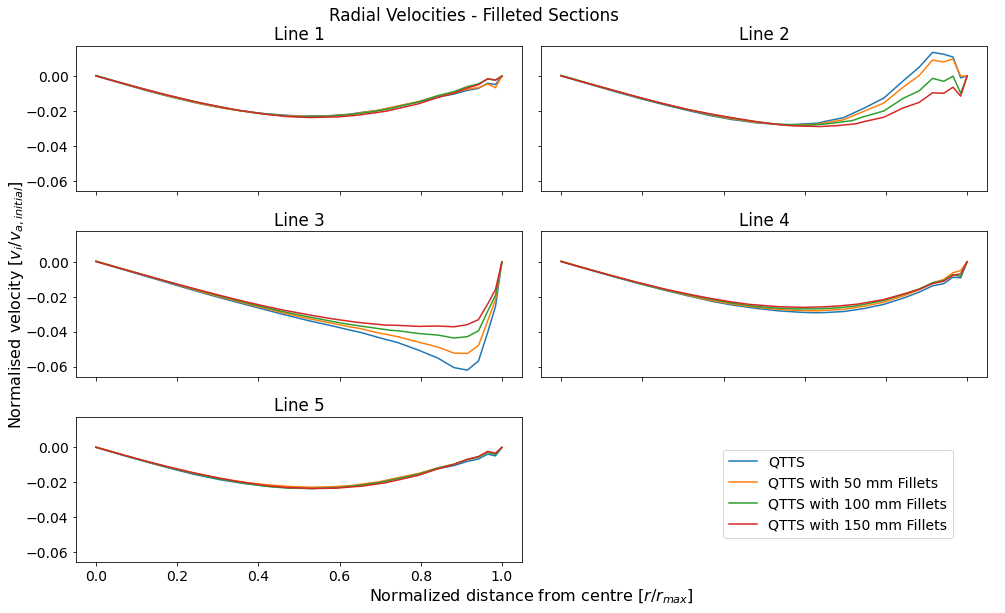

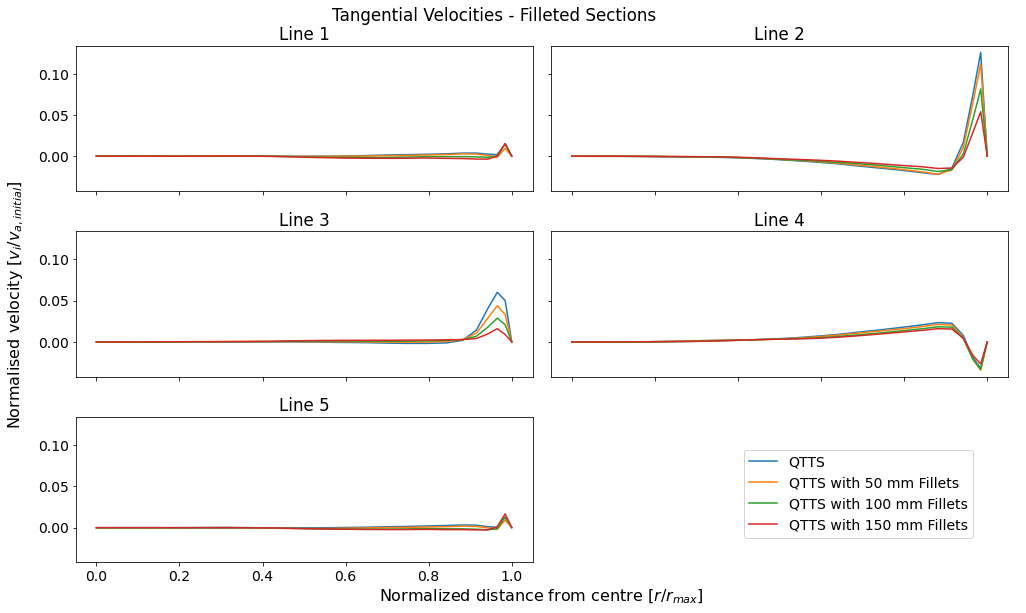

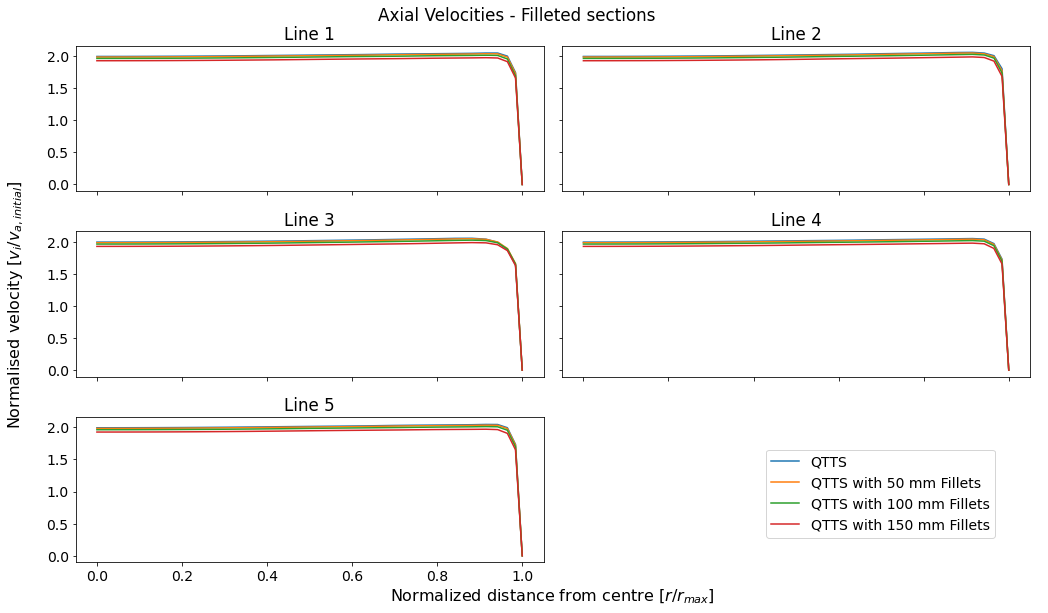

In [10]:
CFD.plotDims(polarFilletList,filletTitles,['Radial Velocities - Filleted Sections','Tangential Velocities - Filleted Sections'],'rt')
CFD.plotDims(filletList,filletTitles,['Axial Velocities - Filleted sections'],'y')


### Plots to compare sections with inserts

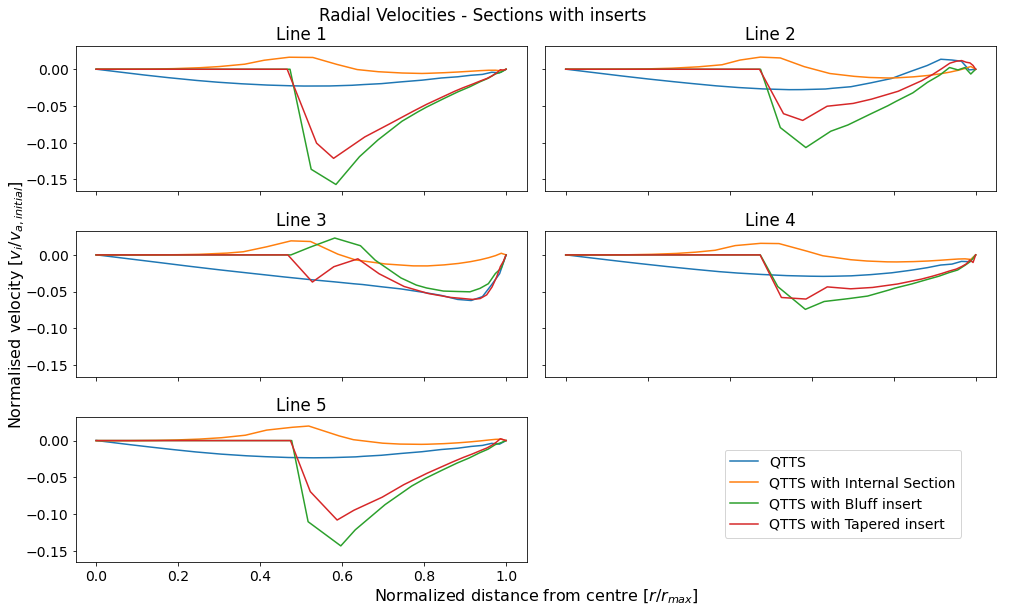

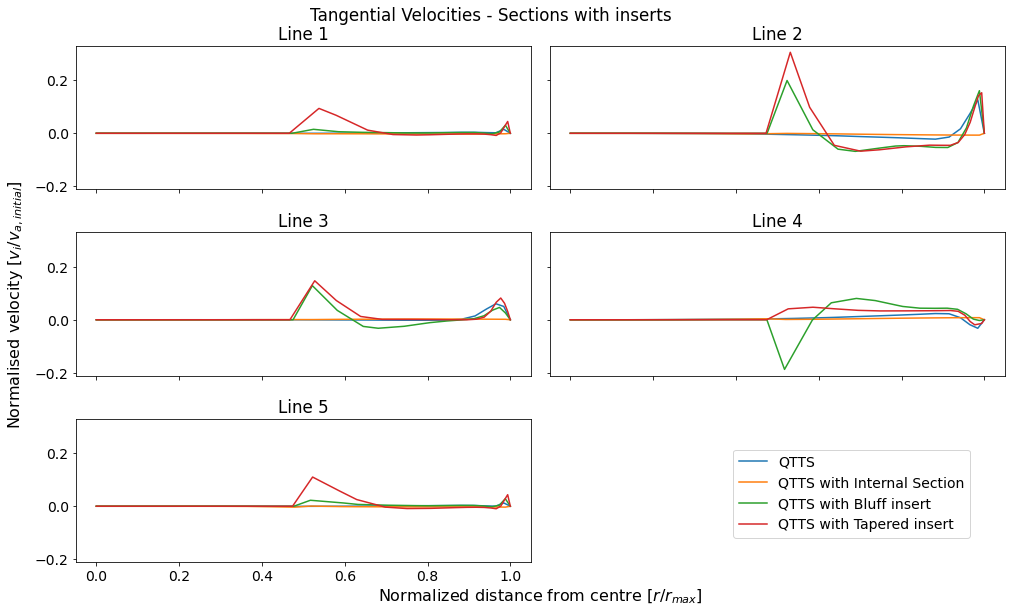

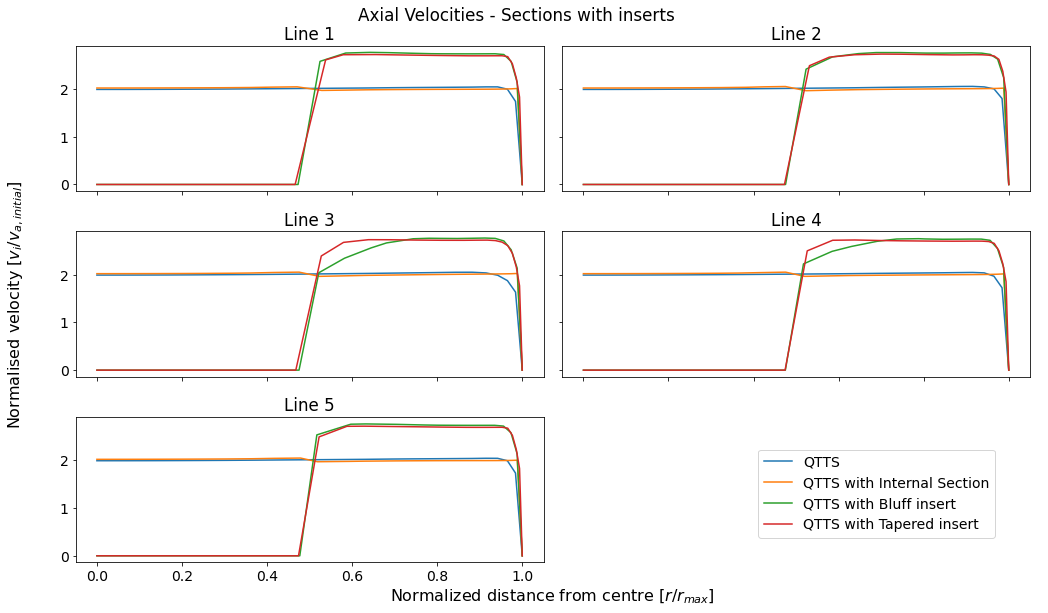

In [11]:
CFD.plotDims(polarInsertList,insertTitles,['Radial Velocities - Sections with inserts','Tangential Velocities - Sections with inserts'],'rt')
CFD.plotDims(insertList,insertTitles,['Axial Velocities - Sections with inserts'],'y')

### Plots to compare spline section generation to original

In [12]:
polarSplineQuarterRoundedInsert[1][:,:,1] = polarSplineQuarterRoundedInsert[1][:,:,1]*-1
polarSplineQuarterTaperedInsert[1][:,:,1] = polarSplineQuarterTaperedInsert[1][:,:,1]*-1

polarSplineList = [polarSplineQuarterRoundedInsert,
                polarSplineQuarterTaperedInsert,
                polarSpline3_8RoundedInsert,
                polarQuarterTaperedInsert
            ]

splineList = [splineQuarterRoundedInsert,
                splineQuarterTaperedInsert,
                spline3_8RoundedInsert,
                quarterTaperedInsert
            ]

splineTitles = ['Spline QTTS with rounded insert',
                'Spline QTTS with tapered insert',
                'Spline 3-8ths TTS with rounded insert',
                'QTTS with tapered insert',
                ]

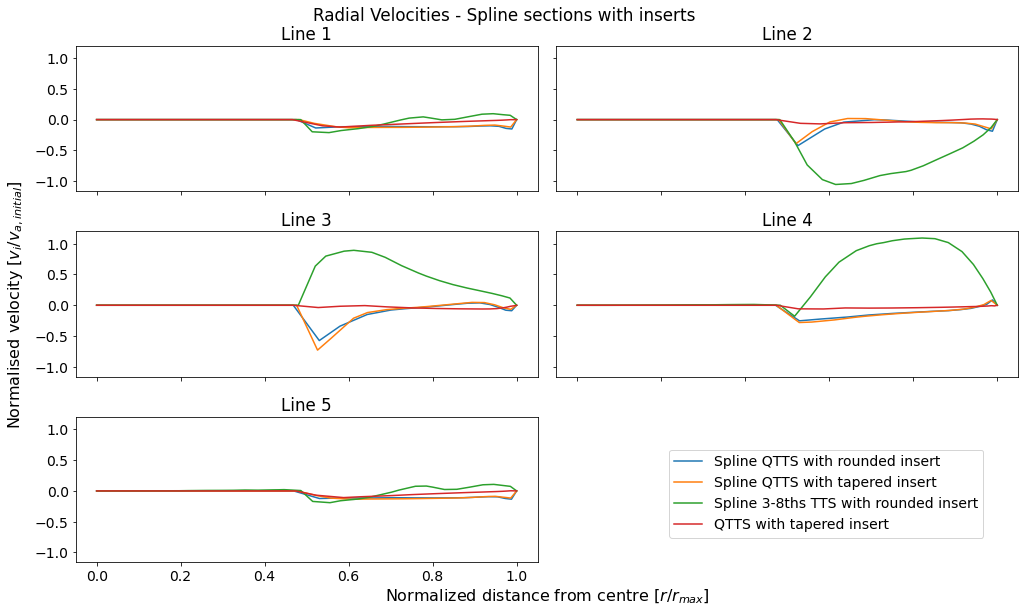

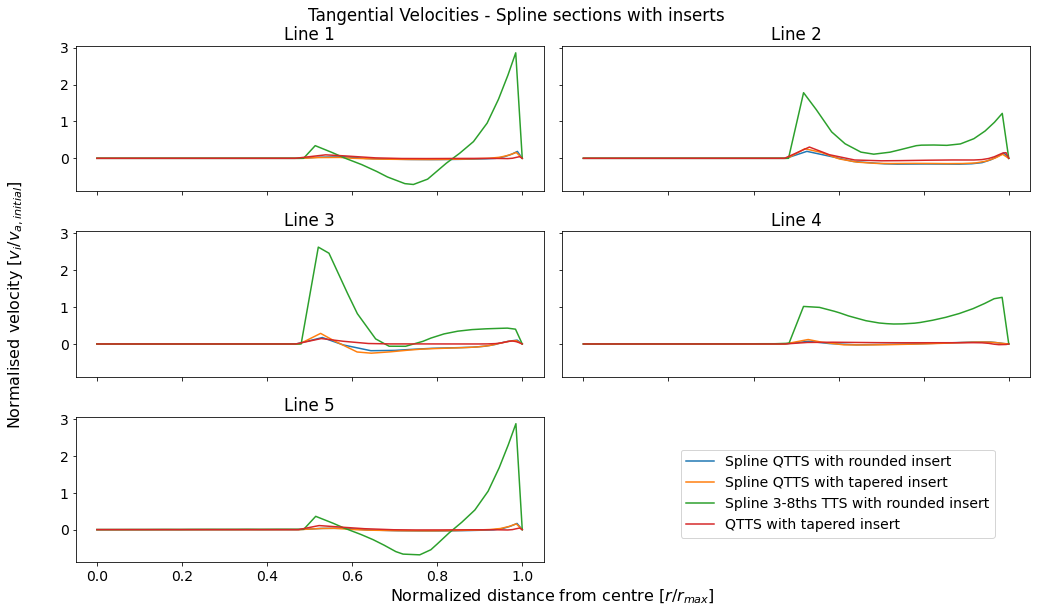

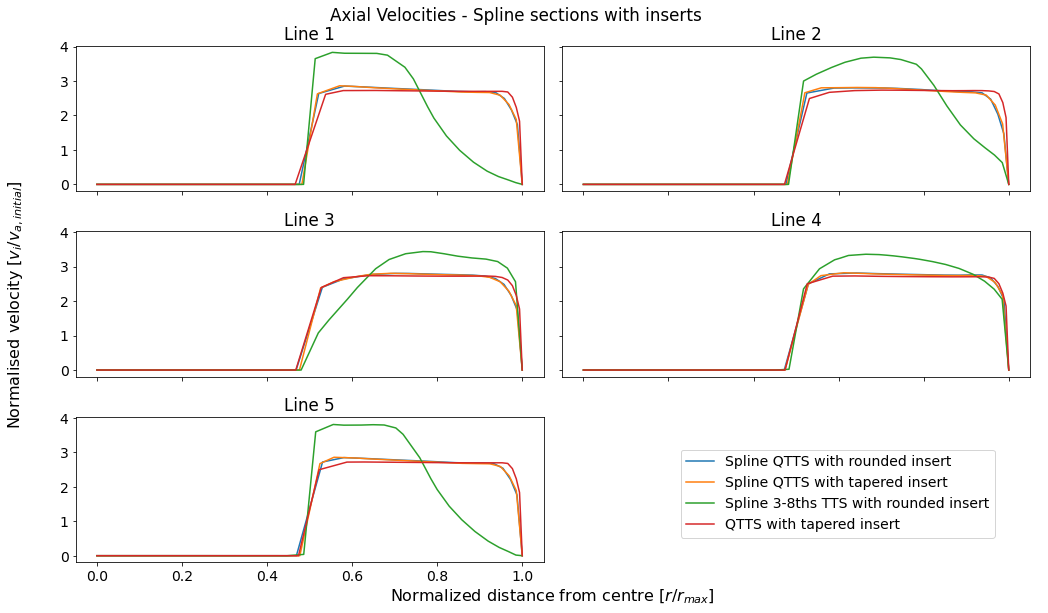

In [13]:
CFD.plotDims(polarSplineList,splineTitles,['Radial Velocities - Spline sections with inserts','Tangential Velocities - Spline sections with inserts'],'rt')
CFD.plotDims(splineList,splineTitles,['Axial Velocities - Spline sections with inserts'],'y')

### Plots for final twist investigation (5/16ths and aggressive twist)

In [14]:
finalList = [s5_16_quarterInsert,
            s5_16_Insert,
            aggressiveQuarter,
            quarterTaperedInsert
            ]

polarFinalList = [polar5_16QuarterInsert,
                polar5_16Insert,
                polarQuarterAggressive,
                polarQuarterTaperedInsert
            ]

finalTitles = ['5/16 turn with Quarter Turn insert',
            '5/16 turn with 5/16 Turn insert',
            'QTTS with aggressive initial turn',
            'QTTS with tapered insert',
            ]

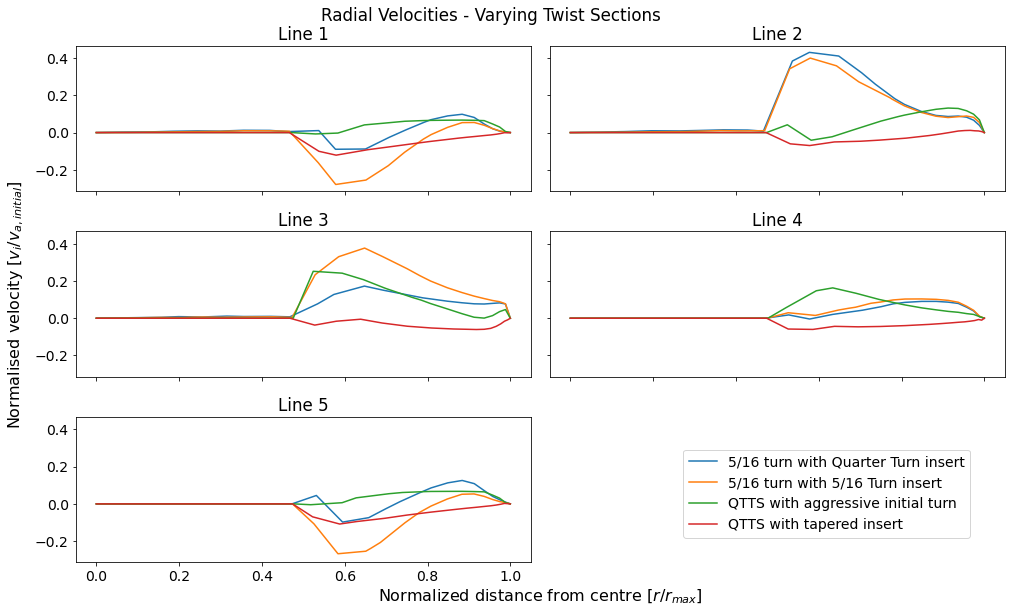

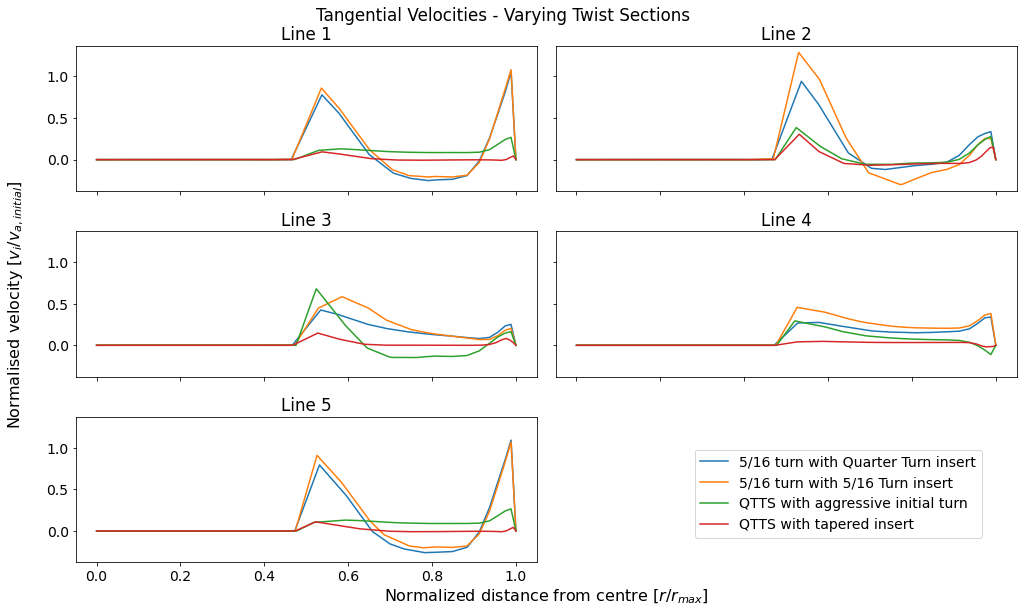

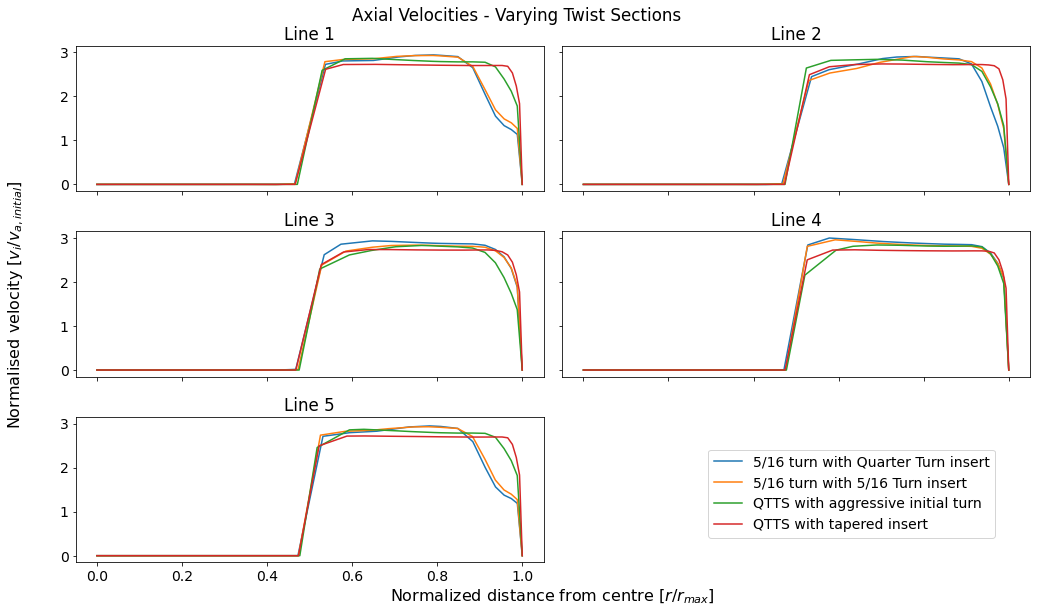

In [15]:
CFD.plotDims(polarFinalList,finalTitles,['Radial Velocities - Varying Twist Sections','Tangential Velocities - Varying Twist Sections'],'rt')
CFD.plotDims(finalList,finalTitles,['Axial Velocities - Varying Twist Sections'],'y')

Coarse - 21759 cells
Medium - 42057 cells
Fine - 81135 cells
Finest - 155801 cells

In [16]:


cc = [21759,42057,81135,155801]

vs = np.array([vpolar_lofted630_coarse[1][3,5,1],
        vpolar_lofted630_medium[1][3,-8,1],
        vpolar_lofted630_fine[1][3,-6,1],
        vpolar_lofted630_finest[1][3,-8,1]
])*-1
r = 1/np.mean([cc[1]/cc[0],cc[2]/cc[1],cc[3]/cc[2]])
print(vs)
print(vs[1]-vs[0])
print(vs[2]-vs[1])
print(vs[3]-vs[2])
print(r)

print(np.log((cc[2]-cc[1])/(cc[1]-cc[0]))/np.log(r))
print(np.log((cc[3]-cc[2])/(cc[2]-cc[1]))/np.log(r))

p = -1*np.mean([np.log((cc[2]-cc[1])/(cc[1]-cc[0]))/np.log(r),np.log((cc[3]-cc[2])/(cc[2]-cc[1]))/np.log(r)])

eUapprox = [
        (vs[1]-vs[0])/(1-r**p),
        (r**p)*(vs[1]-vs[0])/(1-r**p),
        (vs[3]-vs[2])/(1-r**p),
        (r**p)*(vs[3]-vs[2])/(1-r**p)
]

print(eUapprox)

[0.00293423 0.00657526 0.01163181 0.01494709]
0.003641027609298443
0.005056549992900001
0.00331527926855321
0.5188254413600009
-0.9982466922775692
-0.9867071541900699
[0.007607551647238287, 0.003966524037939844, 0.006926934087543641, 0.003611654818990431]


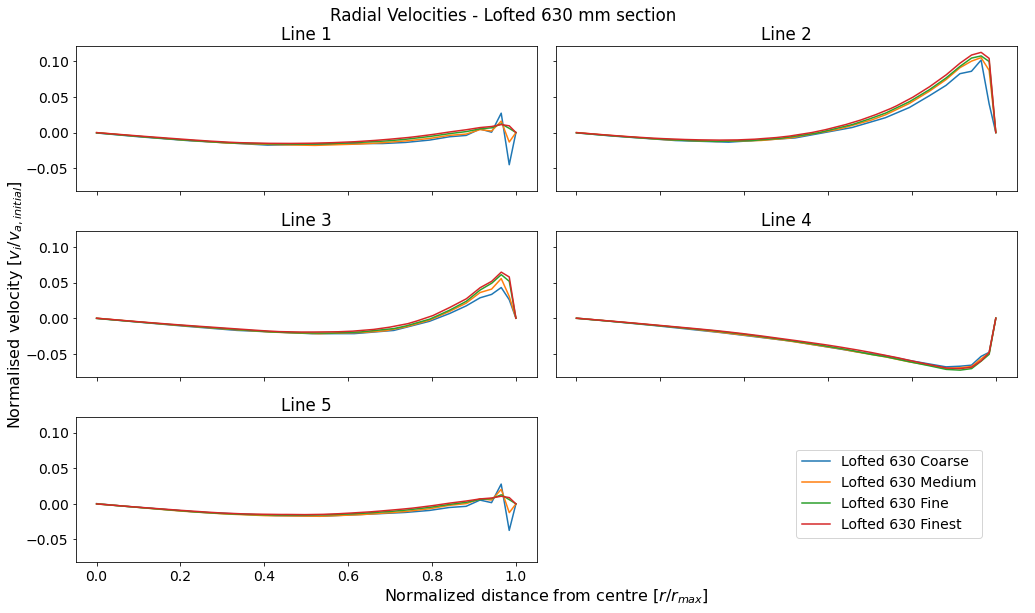

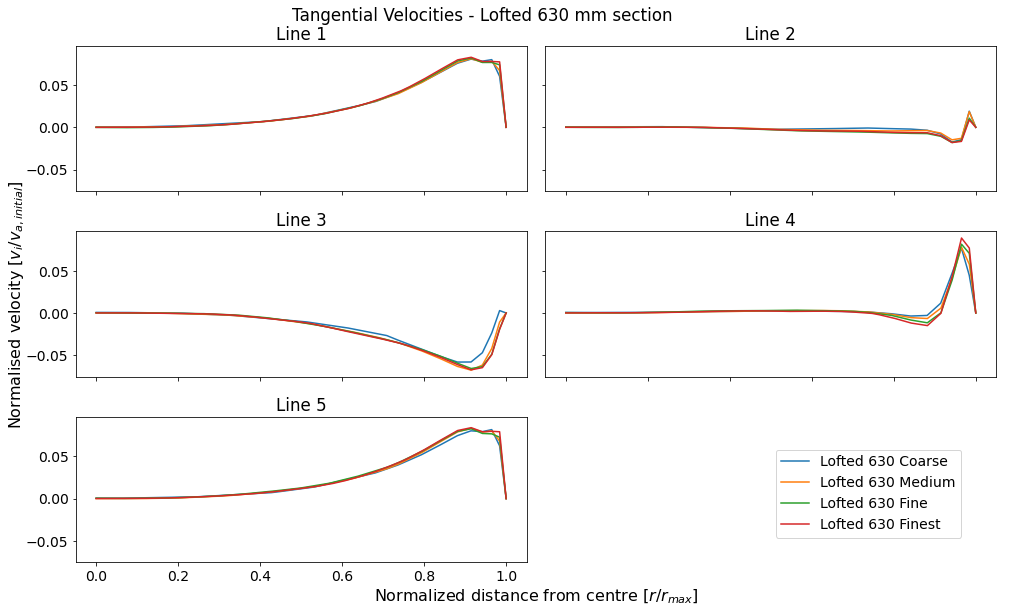

In [17]:
loftList = [
    vpolar_lofted630_coarse,
    vpolar_lofted630_medium,
    vpolar_lofted630_fine,
    vpolar_lofted630_finest
]

loftNameList = [
    "Lofted 630 Coarse",
    "Lofted 630 Medium",
    "Lofted 630 Fine",
    "Lofted 630 Finest"
]

CFD.plotDims(loftList,loftNameList,['Radial Velocities - Lofted 630 mm section','Tangential Velocities - Lofted 630 mm section'],'rt')


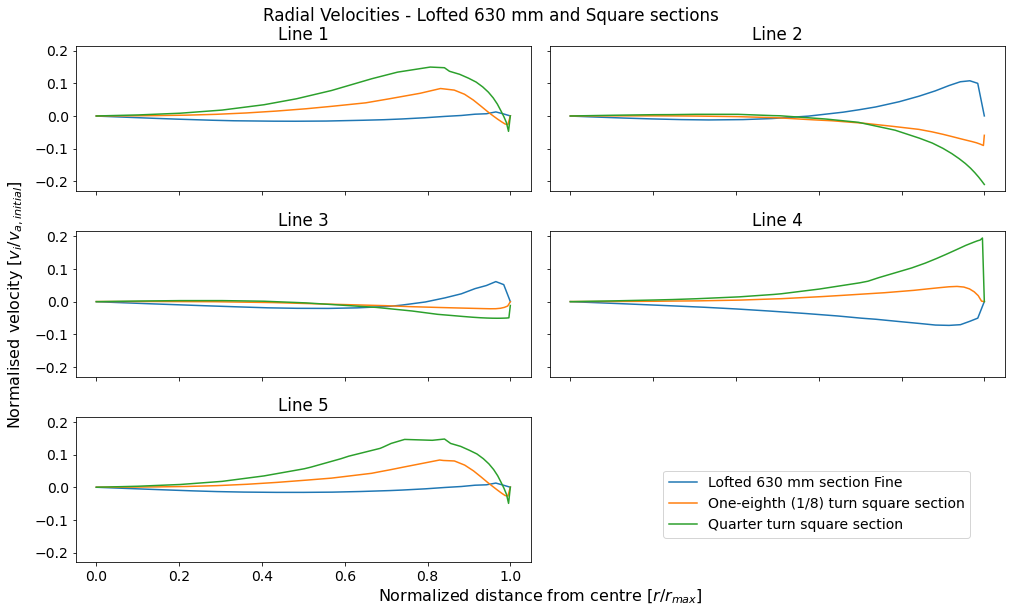

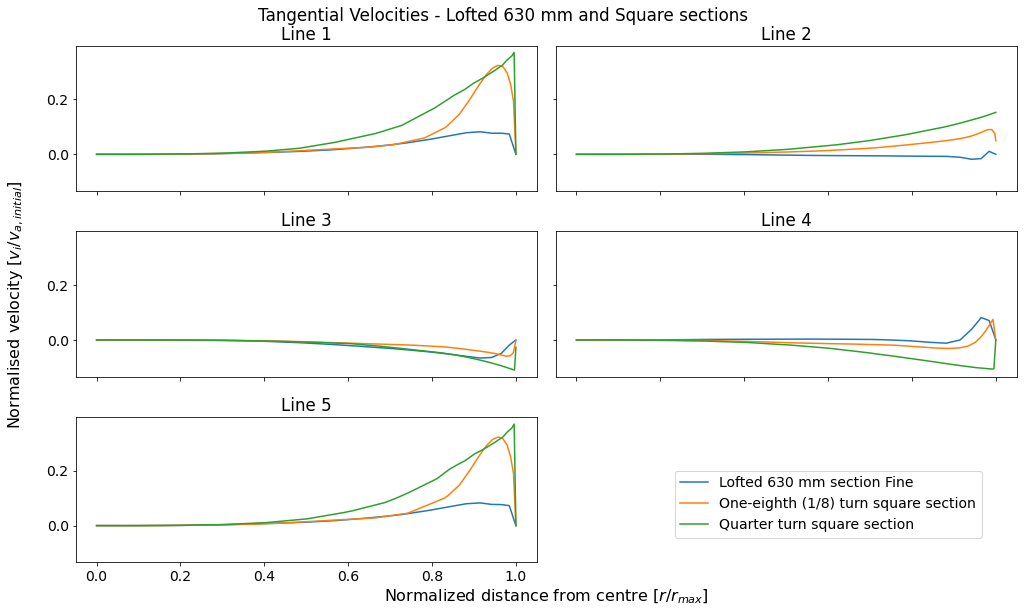

In [18]:
vpolar_8th[1][:,:,1] = vpolar_8th[1][:,:,1]*-1
vpolar_quarter[1][:,:,1] = vpolar_quarter[1][:,:,1]*-1
loftSquare = [
    vpolar_lofted630_fine,
    vpolar_8th,
    vpolar_quarter
]

loftSquareNames = [
    'Lofted 630 mm section Fine',
    'One-eighth (1/8) turn square section',
    'Quarter turn square section'
]
CFD.plotDims(loftSquare,loftSquareNames,['Radial Velocities - Lofted 630 mm and Square sections','Tangential Velocities - Lofted 630 mm and Square sections'],'rt')


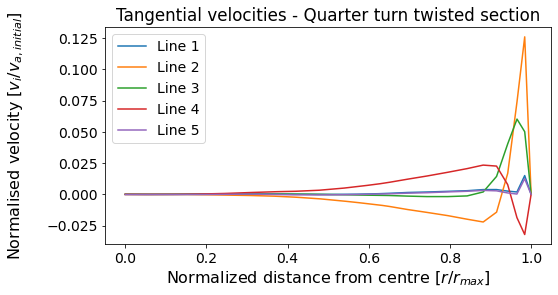

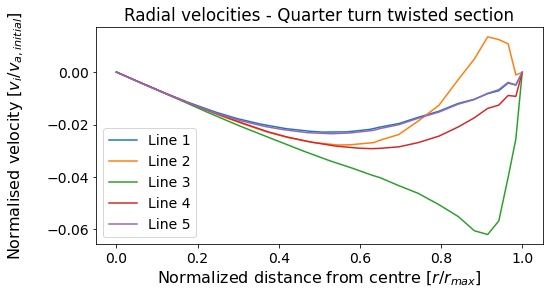

In [19]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
for i in range(5):
    ax.plot(polarQuarterBase[1][i,:,0],polarQuarterBase[1][i,:,1])

plt.title("Tangential velocities - Quarter turn twisted section")
plt.xlabel("Normalized distance from centre [$r/r_{max}$]", fontsize = 16)
plt.ylabel("Normalised velocity [$v_{i}/v_{a,initial}$]", fontsize = 16,labelpad=20)
plt.legend(['Line 1','Line 2','Line 3','Line 4','Line 5'])
fig.savefig(f'Figures\QuarterBaseTangential.pdf',bbox_inches = 'tight')

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
for i in range(5):
    ax.plot(polarQuarterBase[0][i,:,0],polarQuarterBase[0][i,:,1])

plt.title("Radial velocities - Quarter turn twisted section")
plt.xlabel("Normalized distance from centre [$r/r_{max}$]", fontsize = 16)
plt.ylabel("Normalised velocity [$v_{i}/v_{a,initial}$]", fontsize = 16,labelpad=20)
plt.legend(['Line 1','Line 2','Line 3','Line 4','Line 5'])
fig.savefig(f'Figures\QuarterBaseRadial.pdf',bbox_inches = 'tight')